In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.laborfunctions as lf
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches

In [117]:
# Load labor capacity data
ds = xr.open_dataset('../data/processed/GFDL/Monthly_Capacity/monthly_capacity_ens1-3_1950-2100.nc').rename({'__xarray_dataarray_variable__':'capacity'})

In [118]:
ds_base = ds.sel(time=slice('1980-01-31','1999-12-31')).mean(dim='ensemble').groupby('time.month').mean()['capacity']

In [119]:
ds = ds.sel(time=slice('2000-01-31',None))['capacity']

In [129]:
test_ds = ds.to_dataset()

In [136]:
test_ds['base'] = ds_base.sel(month=test_ds['time.month'],lat=test_ds['lat'],lon=test_ds['lon'])

In [142]:
ds_under = test_ds['capacity']<test_ds['base']

In [147]:
ds_3 = ds_under.groupby('time.year').sum() > 3

In [146]:
def emergence(ds,start_year):
    ds_thres = ds.nonzero()
    
    # If non-empty, index + startyear = ToE
    if len(ds_thres[0]) > 0:
        return start_year+(ds_thres[0][0].item())
    
    # If empty, return year after 2100
    return 2101

In [154]:
result = xr.apply_ufunc(emergence,ds_3,input_core_dims=[['year']],vectorize=True,kwargs={'start_year':2000})

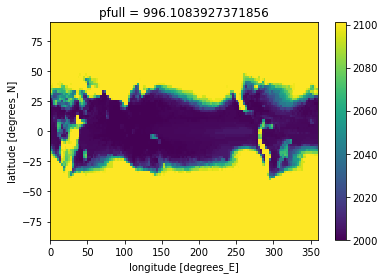

In [155]:
result.mean('ensemble').plot()

In [11]:
from dask.diagnostics import ProgressBar

In [2]:
ds = xr.open_dataset('../data/processed/GFDL/Monthly_Capacity/monthly_capacity_ens001-003_1950-2100.nc').rename({'__xarray_dataarray_variable__':'capacity'})

In [4]:
ds_base = lf.calc_baseline(ds)

In [52]:
ds_esm2m = ds.sel(time=slice('2000-01-31',None))['capacity']

In [93]:
labor_thres = [0.9,0.8,0.7]

# Calculate ToEs for all grid cells and ensemble members
ds_toe = lf.toe2(ds_esm2m,ds_base,labor_thres)

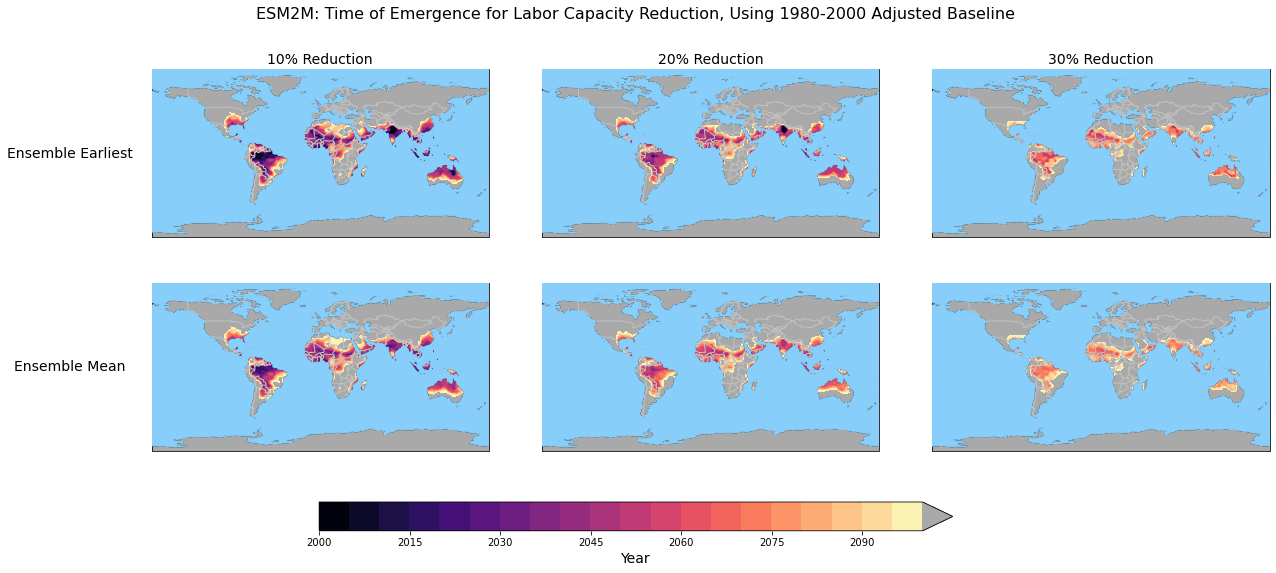

In [92]:
lf.spatial_toe(ds_toe,'ESM2M: Time of Emergence for Labor Capacity Reduction, Using 1980-2000 Adjusted Baseline')